## Strategic Location for Establishing an Asian Restaurant

### Introduction / Business Problem

The success of establishing a new restaurant depends on several factors: demand, brand loyalty, quality of food, competition, and so on. In most cases, a restaurant's location plays an essential determinant for its success. Hence, it is advantageous and of utmost importance to determine the most strategic location for establishment in order to maximize business profits.


#### Business Problem:
Client seeks to establish a franchised Asian restaurant in a Toronto neighborhood. Which neighborhood would appear to be the optimal and most strategic location for the business

A client seeks to establish a franchised Asian restaurant in a Toronto neighborhood. Which neighbourhood would appear to be the optimal and most strategic location for the business operations? The objective of this capstone project is to locate the optimal neighborhood for operation. Our foundation of reasoning would be based off of spending power, distribution of ethnic group, and competition, across each neighbourhood. We will mainly be utilizing the Foursquare API and the extensive geographical and census data from Toronto's Open Data Portal.

#### Data
The Foursquare API will be used to explore neighborhoods in Toronto, more specifically, we will be using the explore function to get the most common venue categories in each neighborhood.

Neighbourhood names, alongside their corresponding boroughs and postal codes, scraped from Wikipedia: (https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050)

The Toronto's census data for its social demographic characteristics will be distilled from Toronto's open data portal.

Geographical coordinates of each neighbourhood: (https://cocl.us/Geospatial_data)

In [1]:
import numpy as np
import pandas as pd
!pip install lxml
!pip install geopy


#### Load data and store in respective dataframes

In [9]:
data  = pd.read_csv('wellbeing_toronto.csv')
data.drop(columns='Combined Indicators',inplace=True)

column = ['Neighbourhood', 'Neighbourhood Id', 'Pop 15 - 19 years','Pop 20 - 24 years','Pop 25 - 29 years', 'Youth 15-24',
          'After-Tax Household Income', 'Vehicle Thefts', 'Thefts', 'Robberies',
          'South Asian', 'Total Population']
data.columns = column

data['% South Asian']= data['South Asian']/data['Total Population']
data['Pop 20 - 29 years'] = data['Pop 20 - 24 years'] + data['Pop 25 - 29 years']
data.sort_values(by='% South Asian',axis=0,ascending=False,inplace=True)
data.head()

,Neighbourhood,Neighbourhood Id,Pop 15 - 19 years,Pop 20 - 24 years,Pop 25 - 29 years,Youth 15-24,After-Tax Household Income,Vehicle Thefts,Thefts,Robberies,South Asian,Total Population,% South Asian,Pop 20 - 29 years
54,Thorncliffe Park,55.0,1245.0,1210.0,1505.0,2455.0,38645.0,4.0,11.0,12.0,9845.0,21108.0,0.466411,2715.0
130,Rouge,131.0,3265.0,3435.0,3180.0,6700.0,72784.0,19.0,12.0,29.0,20175.0,46496.0,0.433908,6615.0
0,West Humber-Clairville,1.0,2325.0,3120.0,2785.0,5445.0,59703.0,316.0,38.0,82.0,13920.0,33312.0,0.417867,5905.0
136,Woburn,137.0,3400.0,4260.0,4060.0,7660.0,47908.0,31.0,16.0,58.0,21545.0,53485.0,0.402823,8320.0
131,Malvern,132.0,3170.0,3450.0,3210.0,6620.0,53425.0,36.0,7.0,54.0,17465.0,43794.0,0.398799,6660.0


#### Merging Respective Dataframe and Get total percentage of south Asian people in respective area

In [10]:
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050')[0]

df = df[df['Borough']!='Not assigned']
df = pd.merge(df, df_geo, left_on='Postcode', right_on='Postal Code').drop(['Postal Code', 'Postcode', 'Borough'], axis=1)
df = pd.merge(df,data, on='Neighbourhood', how='left').dropna(how='any', axis=0).reset_index(drop=True)
df.drop(['Neighbourhood Id'],axis = 1 , inplace=True)

df.rename(columns={'After-Tax Household Income': 'Household Income'}, inplace=True)
df.sort_values(by='% South Asian',axis=0,ascending=False,inplace=True)
df=df.reset_index(drop=True)
df=df[['Neighbourhood', 'Latitude', 'Longitude', 'Pop 20 - 29 years', 
      'Household Income','% South Asian']]
df.head()

,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian
0,Thorncliffe Park,43.705369,-79.349372,2715.0,38645.0,0.466411
1,Rouge,43.806686,-79.194353,6615.0,72784.0,0.433908
2,Woburn,43.770992,-79.216917,8320.0,47908.0,0.402823
3,Malvern,43.806686,-79.194353,6660.0,53425.0,0.398799
4,Highland Creek,43.784535,-79.160497,2045.0,87321.0,0.361373


In [11]:
from geopy.geocoders import Nominatim
address = 'Toronto'
geolocator = Nominatim(user_agent='to_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
43.716316	-79.239476
print("The geographical coordinates of Toronto are {}, {}".format(latitude, longitude))

The geographical coordinates of Toronto are 43.6534817, -79.3839347


In [12]:

# Folium mapping
import folium
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label)
    folium.CircleMarker(
          [lat,lng],
          radius=8,
          color='blue',
          popup=label,
          fill_color='#3186cc',
          fill_opacity=0.7,
          fill=True

  ).add_to(map_Toronto)

map_Toronto

#### Foursquare Credential for exploring location data

In [13]:
# @hidden_cell
CLIENT_ID = '10MCESV5DYWAO0A3B1PMN5PEPGILFKXYYXCSUMTA3AHTLQAH' # your Foursquare ID
CLIENT_SECRET = 'GJ54RTFWQCODJWSTWWCBMTZNFMJANXESGV5ZV02R14U0JEIT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30


#### 
Get the top 100 venues that are in Toronto within a radius of 1500 meters

In [14]:
import requests
LIMIT = 100
radius = 1500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        #create the API request url
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
         )
        try:
                results = requests.get(url).json()['response']['groups'][0]['items']
        except ValueError:
            continue
        # make the GET request
        

        # return only relevant information for each nearby venue
        venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results
        ])
  
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                           'Neighbourhood Latitude',
                           'Neighbourhood Longitude',
                           'Venue',
                           'Venue Latitude',
                           'Venue Longitude',
                           'Venue Category']

    return(nearby_venues)

In [15]:
toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                 latitudes=df['Latitude'],
                                 longitudes=df['Longitude'])

toronto_venues

Thorncliffe Park
Rouge
Woburn
Malvern
Highland Creek
Flemingdon Park
Oakridge
Scarborough Village
Morningside
Dorset Park
Humber Summit
Ionview
Kennedy Park
Henry Farm
Cliffcrest
West Hill
Agincourt North
Victoria Village
Milliken
Hillcrest Village
Guildwood
Bayview Village
Roncesvalles
New Toronto
Willowdale West
Alderwood
Weston
Mount Dennis
Bathurst Manor
Long Branch
The Beaches
Little Portugal
Humewood-Cedarvale
Markland Wood
Forest Hill North


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Thorncliffe Park,43.705369,-79.349372,Costco,43.707051,-79.348093,Warehouse Store
1,Thorncliffe Park,43.705369,-79.349372,Iqbal Kebab & Sweet Centre,43.705923,-79.351521,Indian Restaurant
2,Thorncliffe Park,43.705369,-79.349372,Amsterdam Brewery,43.706404,-79.357162,Brewery
3,Thorncliffe Park,43.705369,-79.349372,Adamson Barbecue,43.712452,-79.353083,BBQ Joint
4,Thorncliffe Park,43.705369,-79.349372,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
5,Thorncliffe Park,43.705369,-79.349372,Fit4Less,43.705689,-79.346018,Gym
6,Thorncliffe Park,43.705369,-79.349372,Olde Yorke Fish & Chips,43.706141,-79.361829,Fish & Chips Shop
7,Thorncliffe Park,43.705369,-79.349372,Enduro Sport,43.706059,-79.361835,Bike Shop
8,Thorncliffe Park,43.705369,-79.349372,Aroma Espresso Bar,43.705611,-79.360775,Coffee Shop
9,Thorncliffe Park,43.705369,-79.349372,Pasha Authentic Turkish Cuisine,43.708240,-79.342699,Turkish Restaurant


In [16]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix='', prefix_sep='')

# add neighbourhood to column back to data frame
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']

# move neighbourhood column to the first column
cols = list(toronto_onehot)
cols

['Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Amphitheater',
 'Antique Shop',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Beach',
 'Beer Bar',
 'Beer Store',
 'Big Box Store',
 'Bike Shop',
 'Bistro',
 'Bookstore',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bridge',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Butcher',
 'Café',
 'Campground',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Rec Center',
 'Comfort Food Restaurant',
 'Concert Hall',
 'Convenience Store',
 'Cosmetics Shop',
 'Cuban Restaurant',
 'Cupcake Shop',
 'Curlin

Analyze each neighbourhood with One Hot Encoding

In [17]:
cols.insert(0, cols.pop(cols.index('Neighbourhood')))
toronto_onehot = toronto_onehot.loc[:,cols]
toronto_onehot

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Thorncliffe Park,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Thorncliffe Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group rows by neighbourhood and by taking the mean of the frequency of occurrence of Asian restaurants

In [18]:

toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped = toronto_grouped[['Neighbourhood', 'Asian Restaurant']]
toronto_grouped.set_index('Neighbourhood', inplace=True)
toronto_grouped

,Asian Restaurant
Neighbourhood,
Agincourt North,0.013333
Alderwood,0.000000
Bathurst Manor,0.000000
Bayview Village,0.000000
Cliffcrest,0.025641
Dorset Park,0.018182
Flemingdon Park,0.011494
Forest Hill North,0.010000
Guildwood,0.030303


### Plotting a bar graph to showcase the frequency distribution of Asian restaurants in each neighbourhood.

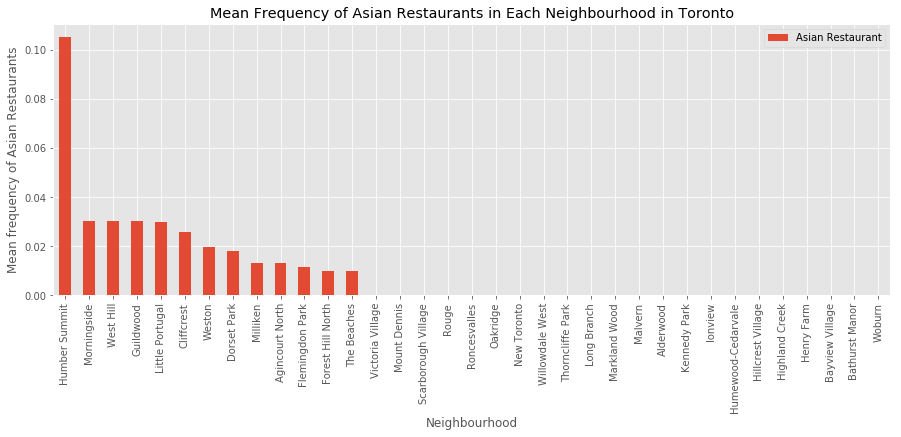

In [19]:
# sort by descending order
toronto_grouped.sort_values(by='Asian Restaurant', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
toronto_grouped.plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of Asian Restaurants in Each Neighbourhood in Toronto')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean frequency of Asian Restaurants')

plt.show()

As inferred from the bar chart, Humber Summit is most densely populated with Asian Restaurants; hence, it is not advisable for business operations to be taken place here.



#### Plotting a bar graph to illustrate the distribution of South Asian population group in each neighbourhood

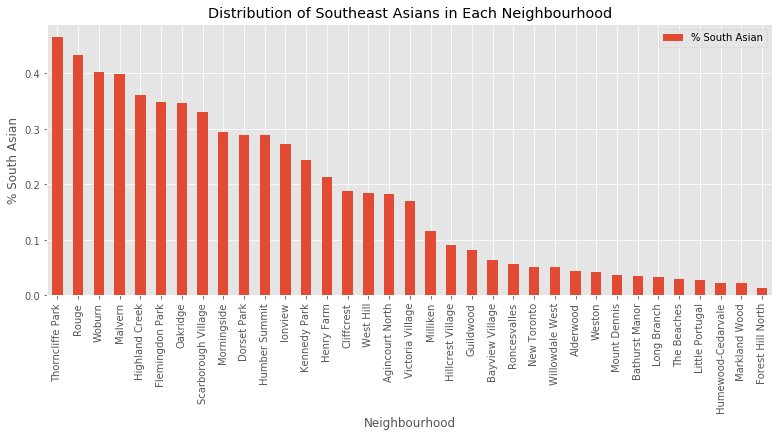

In [20]:

df_ethnic = df[['Neighbourhood', '% South Asian']].set_index('Neighbourhood')

# sort by descending order
df_ethnic.sort_values(by='% South Asian', ascending=False, inplace=True)

#plot bar graph
df_ethnic.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Southeast Asians in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('% South Asian')

plt.show()

As inferred from above, Thomchliffe Park,Rouge,Wobum are some  most densely populated neighbourhood with South Asians.

#### Plotting a bar graph to illustrate the distribution of income groups in each neighbourhood

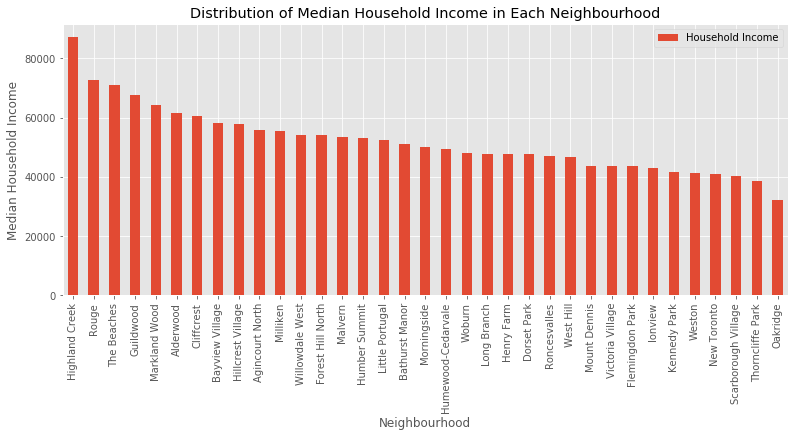

In [21]:
df_income = df[['Neighbourhood', 'Household Income']].set_index('Neighbourhood')

# sort by descending order
df_income.sort_values(by='Household Income', ascending=False, inplace=True)

#plot bar graph
df_income.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Median Household Income in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Household Income')

plt.show()

#### Finalise a dataframe for clustering

In [22]:
# merge df with toronto_grouped
df_final = pd.merge(df, toronto_grouped, on='Neighbourhood')
df_final.head()

,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
0,Thorncliffe Park,43.705369,-79.349372,2715.0,38645.0,0.466411,0.0
1,Rouge,43.806686,-79.194353,6615.0,72784.0,0.433908,0.0
2,Woburn,43.770992,-79.216917,8320.0,47908.0,0.402823,0.0
3,Malvern,43.806686,-79.194353,6660.0,53425.0,0.398799,0.0
4,Highland Creek,43.784535,-79.160497,2045.0,87321.0,0.361373,0.0


To interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

Note: population 20 - 29 years was not consider when clustering

In [23]:

from sklearn.preprocessing import StandardScaler
X =df_final.iloc[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

df_normalized = pd.DataFrame(Clus_dataSet)
df_normalized.rename(columns={0:'Household Income', 1:'% South Asian', 2:'No. of Asian Restaurants'}, inplace=True)
df_normalized.head()

,Household Income,% South Asian,No. of Asian Restaurants
0,-1.229256,2.017233,-0.508949
1,1.891815,1.789729,-0.508949
2,-0.382410,1.572146,-0.508949
3,0.121968,1.543978,-0.508949
4,3.220823,1.282015,-0.508949


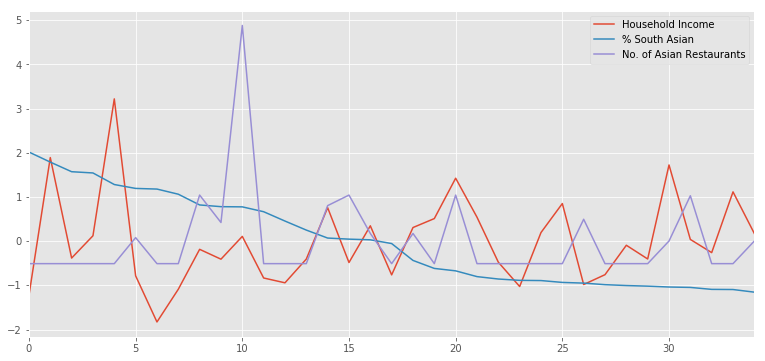

In [24]:
df_normalized.plot(kind='line',figsize=(13,6))

From above graph it looks like there is no direct relationship between any factors mention above.

As we are using Kmeans clustring method for grouping we will try to find optimum K using reduce squareed error but at same time the solution should be not be over generalized

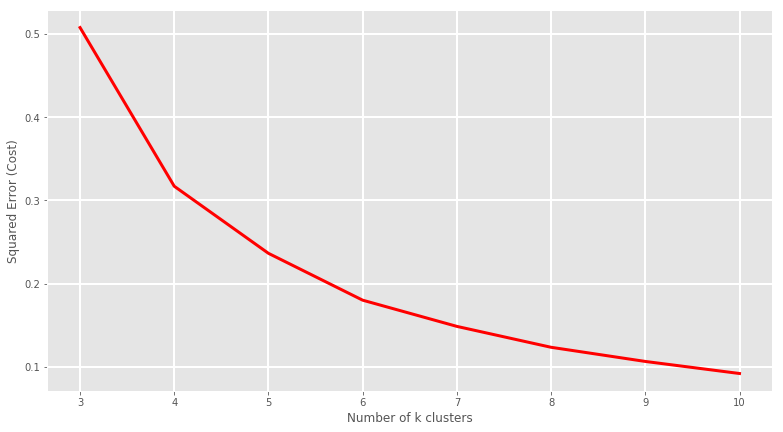

In [25]:

from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 11):
    KM = KMeans(n_clusters=i, max_iter=100)
    try:
        KM.fit(df_normalized)

    except ValueError:
        print('Error on line', i)

  # calculate squared error for the clustered points
    error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

At k=6 Squared error is reduce beyond it solutin is geting over generalized

In [26]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_normalized)

# check cluster labels generated for each row in the dataframe
labels=kmeans.labels_[0:]
labels

array([0, 5, 0, 0, 5, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 2, 2, 4, 2, 1, 2, 1,
       4, 4, 4, 1, 4, 4, 4, 4, 1, 2, 4, 1, 4])

In [27]:
df_clustered =df_final
df_clustered.insert(0, 'Cluster Label', kmeans.labels_)
df_clustered.head()

,Cluster Label,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
0,0,Thorncliffe Park,43.705369,-79.349372,2715.0,38645.0,0.466411,0.0
1,5,Rouge,43.806686,-79.194353,6615.0,72784.0,0.433908,0.0
2,0,Woburn,43.770992,-79.216917,8320.0,47908.0,0.402823,0.0
3,0,Malvern,43.806686,-79.194353,6660.0,53425.0,0.398799,0.0
4,5,Highland Creek,43.784535,-79.160497,2045.0,87321.0,0.361373,0.0


### Visulize the clusters on a map

In [28]:

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['Neighbourhood'], df_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [29]:
temp=df_clustered.groupby('Cluster Label').mean()
temp.sort_values(by='Cluster Label',axis=0,ascending=True,inplace=True)

In [30]:
temp

,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
Cluster Label,,,,,,
0,43.745658,-79.276954,3577.500000,43578.500000,0.331405,0.002968
1,43.702599,-79.432629,2098.000000,62473.200000,0.050023,0.002000
2,43.755066,-79.256359,3040.714286,55544.285714,0.153940,0.024745
3,43.756303,-79.565963,1740.000000,53272.000000,0.289143,0.105263
4,43.690869,-79.453492,2109.000000,47284.300000,0.051145,0.002961
5,43.795611,-79.177425,4330.000000,80052.500000,0.397641,0.000000


### Cluster 0

In [31]:
df_clustered.loc[df_clustered['Cluster Label'] == 0]

,Cluster Label,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
0,0,Thorncliffe Park,43.705369,-79.349372,2715.0,38645.0,0.466411,0.000000
2,0,Woburn,43.770992,-79.216917,8320.0,47908.0,0.402823,0.000000
3,0,Malvern,43.806686,-79.194353,6660.0,53425.0,0.398799,0.000000
5,0,Flemingdon Park,43.725900,-79.340923,3175.0,43511.0,0.348789,0.011494
6,0,Oakridge,43.711112,-79.284577,1645.0,32079.0,0.346696,0.000000
7,0,Scarborough Village,43.744734,-79.239476,2275.0,40181.0,0.330065,0.000000
9,0,Dorset Park,43.757410,-79.273304,3265.0,47630.0,0.289765,0.018182
11,0,Ionview,43.727929,-79.262029,1935.0,42971.0,0.273440,0.000000
12,0,Kennedy Park,43.727929,-79.262029,2225.0,41776.0,0.243240,0.000000
13,0,Henry Farm,43.778517,-79.346556,3560.0,47659.0,0.214018,0.000000


### Cluster 1

In [32]:
df_clustered.loc[df_clustered['Cluster Label'] == 1]

,Cluster Label,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
19,1,Hillcrest Village,43.803762,-79.363452,2195.0,57682.0,0.090056,0.00
21,1,Bayview Village,43.786947,-79.385975,3775.0,58028.0,0.063563,0.00
25,1,Alderwood,43.602414,-79.543484,1380.0,61402.0,0.044798,0.00
30,1,The Beaches,43.676357,-79.293031,2080.0,70957.0,0.029907,0.01
33,1,Markland Wood,43.643515,-79.577201,1060.0,64297.0,0.021793,0.00


### Cluster 2

In [33]:
df_clustered.loc[df_clustered['Cluster Label'] == 2]

,Cluster Label,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
8,2,Morningside,43.763573,-79.188711,2845.0,50069.0,0.295331,0.030303
14,2,Cliffcrest,43.716316,-79.239476,1855.0,60384.0,0.188265,0.025641
15,2,West Hill,43.763573,-79.188711,3745.0,46803.0,0.184725,0.030303
16,2,Agincourt North,43.815252,-79.284577,4020.0,55893.0,0.182564,0.013333
18,2,Milliken,43.815252,-79.284577,3970.0,55464.0,0.115911,0.013333
20,2,Guildwood,43.763573,-79.188711,940.0,67678.0,0.082182,0.030303
31,2,Little Portugal,43.647927,-79.419750,3910.0,52519.0,0.028601,0.030000


### Cluster 3

In [34]:
df_clustered.loc[df_clustered['Cluster Label'] == 3]

,Cluster Label,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
10,3,Humber Summit,43.756303,-79.565963,1740.0,53272.0,0.289143,0.105263


### Cluster 4

In [35]:
df_clustered.loc[df_clustered['Cluster Label'] == 4]

,Cluster Label,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
17,4,Victoria Village,43.725882,-79.315572,2190.0,43743.0,0.170474,0.000000
22,4,Roncesvalles,43.648960,-79.456325,2100.0,46883.0,0.055763,0.000000
23,4,New Toronto,43.605647,-79.501321,1755.0,40859.0,0.051470,0.000000
24,4,Willowdale West,43.782736,-79.442259,3025.0,54226.0,0.050779,0.000000
26,4,Weston,43.706876,-79.518188,2570.0,41356.0,0.042519,0.019608
27,4,Mount Dennis,43.691116,-79.476013,1960.0,43790.0,0.037519,0.000000
28,4,Bathurst Manor,43.754328,-79.442259,1975.0,51076.0,0.034650,0.000000
29,4,Long Branch,43.602414,-79.543484,1520.0,47680.0,0.032725,0.000000
32,4,Humewood-Cedarvale,43.693781,-79.428191,2400.0,49252.0,0.022276,0.000000
34,4,Forest Hill North,43.696948,-79.411307,1595.0,53978.0,0.013275,0.010000


### Cluster 5

In [36]:
df_clustered.loc[df_clustered['Cluster Label'] == 5]

,Cluster Label,Neighbourhood,Latitude,Longitude,Pop 20 - 29 years,Household Income,% South Asian,Asian Restaurant
1,5,Rouge,43.806686,-79.194353,6615.0,72784.0,0.433908,0.0
4,5,Highland Creek,43.784535,-79.160497,2045.0,87321.0,0.361373,0.0
